In [1]:
import tensorflow as tf
import os

In [2]:
# in case you want to limit the GPU usage
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)


In [4]:
import cv2
import imghdr

In [5]:
# the only accepted image extentions
image_exts = ['jpg', 'jpeg','bmp', 'png']
data_dir = 'data'

In [6]:
# remove strange images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)

        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            # remove images with different extentions than the ones in image_exts
            if tip not in image_exts:
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(e)
            prrint(f'Issue with image {image_path}')

Image not in ext list data\algiers\141268900-algiers-cityscape-the-capital-of-algeria.jpg
Image not in ext list data\algiers\21765121_1877021738989496_3756851692536215988_n.jpg
Image not in ext list data\algiers\62-105911-hdhd_157f4a4bf76f6c_700x400.jpeg
Image not in ext list data\algiers\algiers-cityscape-capital-algeria-night-600w-1394959802.jpg
Image not in ext list data\algiers\Algiers-water-front.jpg
Image not in ext list data\algiers\algiers2.jpg
Image not in ext list data\algiers\city-algiers-260nw-105023756.jpg
Image not in ext list data\algiers\coast-park-algiers-ferries-wheel-260nw-1804606144.jpg
Image not in ext list data\algiers\dd9815df-city-10465-164dc53b979.jpg
Image not in ext list data\algiers\dd9815df-city-10465-167c5c4403a.jpg
Image not in ext list data\algiers\description-city-algiers-4-information-about-largest-city-country-million-martyrs.jpg
Image not in ext list data\algiers\entral-street-of-algiers-city-on-november-21-2010-in-algiers-algeria-algiers.jpg
Image n

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size=16)

Found 696 files belonging to 2 classes.


In [9]:
# the data var is not loaded into memory (just a generator) so w need to load it like so
data_iterator = data.as_numpy_iterator()

In [17]:
# splits the iterator into many batches and gets a batch from them
# (set of numpy arrays)
batch = data_iterator.next()

In [12]:
len(batch)

2

In [13]:
batch

(array([[[[102.29492  ,  98.44336  ,  97.55469  ],
          [ 74.64844  ,  75.09375  ,  77.76172  ],
          [  1.6699219,   7.5253906,  16.453125 ],
          ...,
          [153.2168   , 136.03125  , 120.40234  ],
          [144.44727  , 127.447266 , 111.447266 ],
          [127.59375  , 110.59375  ,  94.59375  ]],
 
         [[105.11378  , 101.262215 , 100.37354  ],
          [ 76.1741   ,  76.74684  ,  79.41481  ],
          [  1.776104 ,   8.56374  ,  17.491474 ],
          ...,
          [148.17259  , 130.98705  , 115.35814  ],
          [140.314    , 123.31399  , 107.31399  ],
          [125.24098  , 108.24098  ,  92.24098  ]],
 
         [[108.33717  , 104.47496  , 104.17116  ],
          [ 77.60156  ,  78.04635  ,  81.543686 ],
          [  2.1958504,   9.86079  ,  19.416016 ],
          ...,
          [146.92128  , 129.26807  , 113.872986 ],
          [140.38281  , 122.80859  , 106.58541  ],
          [126.36417  , 108.78995  ,  92.50284  ]],
 
         ...,
 
         [[ 

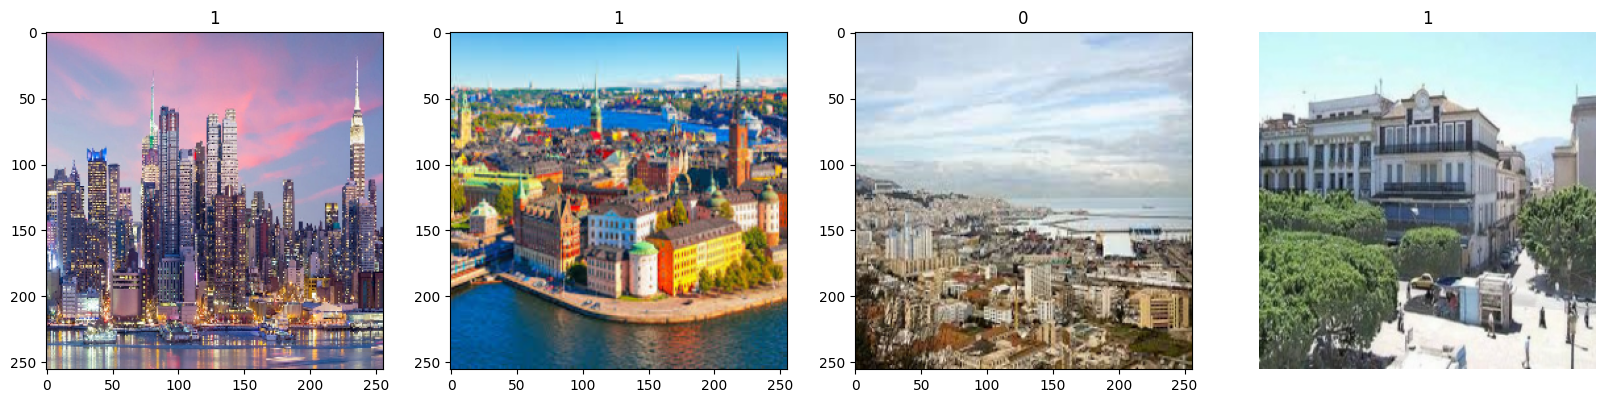

In [18]:
# visualize our data and its labels

fig , ax = plt.subplots(ncols=4, figsize=(20,20))
plt.axis('off')

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
# we can see that 0 stands for algiers and 1 stands for any city but algiers

## Preprocessing Data

In [19]:
# an example of scaling results
scaled = batch[0] / 255

In [23]:
# applying the scaling on all the dataset (but the labels)
data = data.map(lambda x, y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [26]:
# verification of the max/min values
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].min()

0.0

In [32]:
# partitioning the dataset
len(data)

train_size = int(len(data) * 0.7) + 1 # 31
val_size = int(len(data) * 0.15) + 1 # 7
test_size = int(len(data) * 0.15) # 6


(31, 7, 6)

In [34]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.take(train_size + val_size).take(test_size)

In [35]:
len(train), len(val), len(test)

(31, 7, 6)

## Building the deep neural network

In [36]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [37]:
model = Sequential()

In [38]:
# the deep neural network architecture

# the first layer is a convolution with 16 filters of 3*3 matrix kernels and a 1 pixel stride
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# it also contains a max pooling layer formed of 2*2 filters (N.B: max pooling takes the max of activation among small pixel batches of 2*2)
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [40]:
model.compile(
    optimizer='adam',
    loss=tf.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [44]:
log_dir = 'logs'
# usefull for investing in the logs of the model (in cas we want to track it at some particular point)
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

In [45]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
31/31 [==============================] - 24s 713ms/step - loss: 0.8008 - accuracy: 0.5141 - val_loss: 0.6926 - val_accuracy: 0.6339
Epoch 2/20
31/31 [==============================] - 19s 606ms/step - loss: 0.6871 - accuracy: 0.6089 - val_loss: 0.6752 - val_accuracy: 0.5536
Epoch 3/20
31/31 [==============================] - 19s 615ms/step - loss: 0.6653 - accuracy: 0.5827 - val_loss: 0.6129 - val_accuracy: 0.6696
Epoch 4/20
31/31 [==============================] - 20s 625ms/step - loss: 0.6046 - accuracy: 0.6875 - val_loss: 0.5586 - val_accuracy: 0.7054
Epoch 5/20
31/31 [==============================] - 20s 637ms/step - loss: 0.5764 - accuracy: 0.7339 - val_loss: 0.5367 - val_accuracy: 0.8036
Epoch 6/20
31/31 [==============================] - 20s 637ms/step - loss: 0.4204 - accuracy: 0.8024 - val_loss: 0.5849 - val_accuracy: 0.7143
Epoch 7/20
31/31 [==============================] - 20s 643ms/step - loss: 0.3273 - accuracy: 0.8609 - val_loss: 0.3904 - val_accuracy: 0.8482

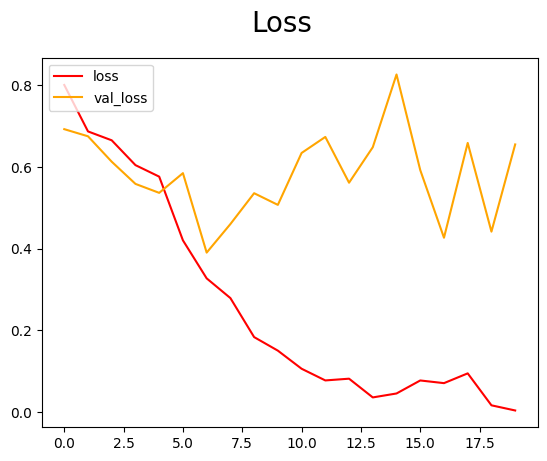

In [46]:
# loss statistics (train -> 'loss' / validation -> 'val loss )
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

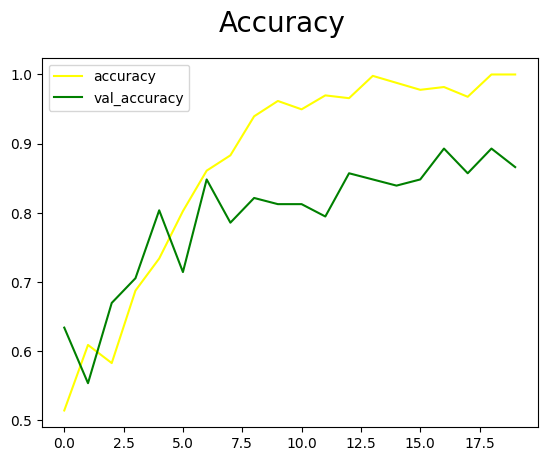

In [47]:
# loss statistics (train -> 'accuracy' / validation -> 'val accuracy )
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='yellow', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## Measuring the Model's performance 

In [48]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [49]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [50]:
# run the metrics on the test batches
for batch in test.as_numpy_iterator():
    x,y = batch
    y_pred = model.predict(x)
    pre.update_state(y, y_pred)
    re.update_state(y, y_pred)
    acc.update_state(y, y_pred)

1/1 [==============================] - 0s 171ms/step


In [51]:
print(' Precision : {}\n Recall : {}\n Accuracy : {}'.format(pre.result().numpy() , re.result().numpy(), acc.result().numpy()))


 Precision : 1.0
 Recall : 1.0
 Accuracy : 1.0


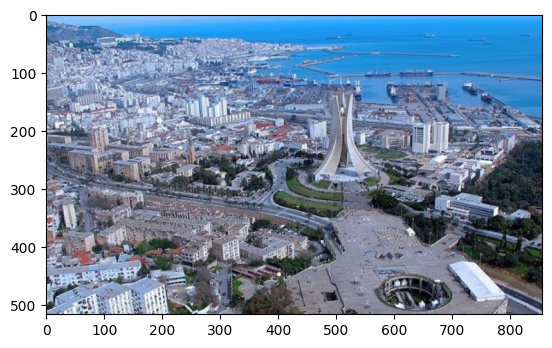

In [55]:
# further testing
algiers_img = cv2.imread('./test/algiers.jpg')
# cv2 saves images as BGR, so they might look 
# weird when attempting to visualize them directly
plt.imshow(cv2.cvtColor(algiers_img, cv2.COLOR_BGR2RGB))
plt.show()

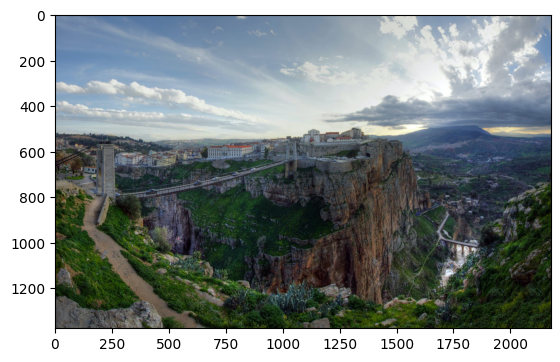

In [57]:
not_algiers_img = cv2.imread('./test/not_algiers.jpg')
# cv2 saves images as BGR, so they might look 
# weird when attempting to visualize them directly
plt.imshow(cv2.cvtColor(not_algiers_img, cv2.COLOR_BGR2RGB))
plt.show()

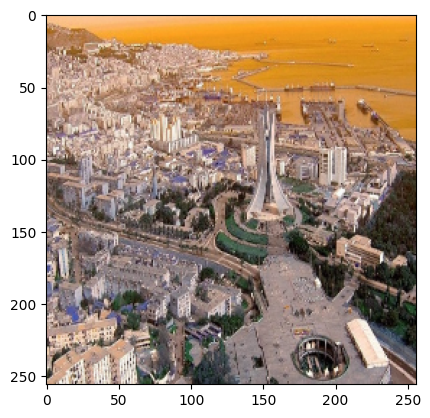

In [70]:
# resizing the images
resize_not_algiers_img = tf.image.resize(not_algiers_img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

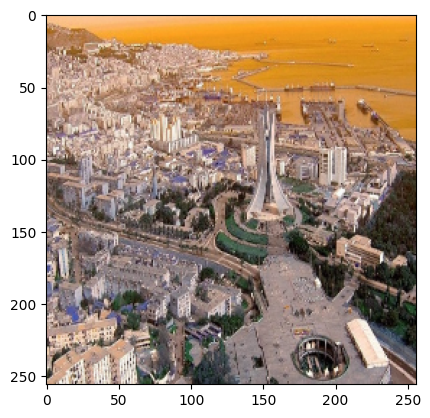

In [71]:
resize_algiers_img = tf.image.resize(algiers_img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [72]:
# we use np.expand_dims because the model is expecting a batch, not only one picture
# therefore, we expand the dimensions of the picture 
y_hat_alg = model.predict(np.expand_dims(resize_algiers_img/255, 0))
y_hat_not_alg = model.predict(np.expand_dims(resize_not_algiers_img/255, 0))


1/1 [==============================] - 0s 34ms/step


In [66]:
y_hat_alg

array([[0.2689623]], dtype=float32)

In [73]:
if y_hat_alg > .5:
    print('the model says that it is Algiers')
else:
    print('the model says it is not Algiers')

the model says that it is Algiers


In [74]:
if y_hat_not_alg > .5:
    print('the model says that it is Algiers')
else:
    print('the model says it is not Algiers')

the model says it is not Algiers


## Save the model

In [76]:
model.save(os.path.join('models', 'happySadModel.h5'))


In [79]:
# the manner to re-load it
from keras.models import load_model

new_model = load_model(os.path.join('models', 'happySadModel.h5'))